In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from utility.data_generator import make_multitarget_regression
from utility.rectangle import Rectangle
from utility.graphing_tools import short_cut_illustration, small_sample_illustration, single_dim_text_file

# styles fix
plt.rcParams.update({
    "font.size": 9, 
    "axes.labelsize": 9,
    "axes.titlesize": 10,
    "legend.fontsize": 8.5,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
})

# Data generation

In [2]:
# Training and test data
X, y, coef_true = make_multitarget_regression(n_samples=5000, n_features=10, n_informative= 10, n_targets=2, noise_list=[2, 1], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
prediction_test = model.predict(X_test)
scores_test = np.abs(prediction_test - y_test)

# Calibration n=10, 20, 50
X_cal10, y_cal10 = make_multitarget_regression(n_samples=10, n_features=10, n_informative= 10, n_targets=2, noise_list=[2, 1], random_state=77, coef=coef_true)
X_cal20, y_cal20 = make_multitarget_regression(n_samples=20, n_features=10, n_informative= 10, n_targets=2, noise_list=[4, 1], random_state=82, coef=coef_true)
X_cal50, y_cal50 = make_multitarget_regression(n_samples=50, n_features=10, n_informative= 10, n_targets=2, noise_list=[2, 1], random_state=77, coef=coef_true)

prediction_cal10 = model.predict(X_cal10)
scores_cal10 = np.abs(prediction_cal10 - y_cal10)

prediction_cal20 = model.predict(X_cal20)
scores_cal20 = np.abs(prediction_cal20 - y_cal20)

prediction_cal50 = model.predict(X_cal50)
scores_cal50 = np.abs(prediction_cal50 - y_cal50)

In [3]:
from utility.res_rescaled import scaled_prediction, standardized_prediction

(<Figure size 500x500 with 1 Axes>, array([<Axes: >], dtype=object))

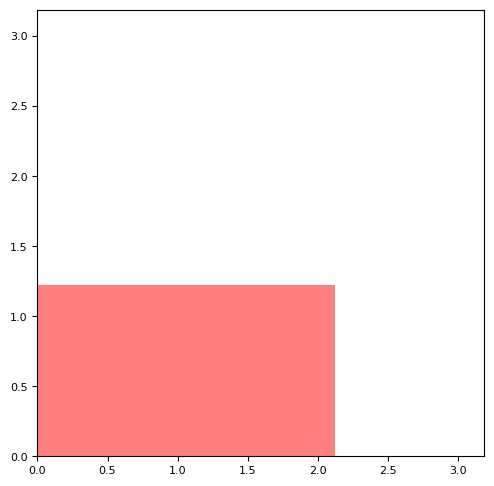

In [4]:
standardized_prediction(scores_cal50, 0.5, False)[1].plot()

In [17]:
standardized_prediction(scores_cal50, 0.5, True).info()

array([[0.        , 0.        ],
       [2.12560154, 1.21945074]])

# Illustrations generation

## Short-cut

### n=10

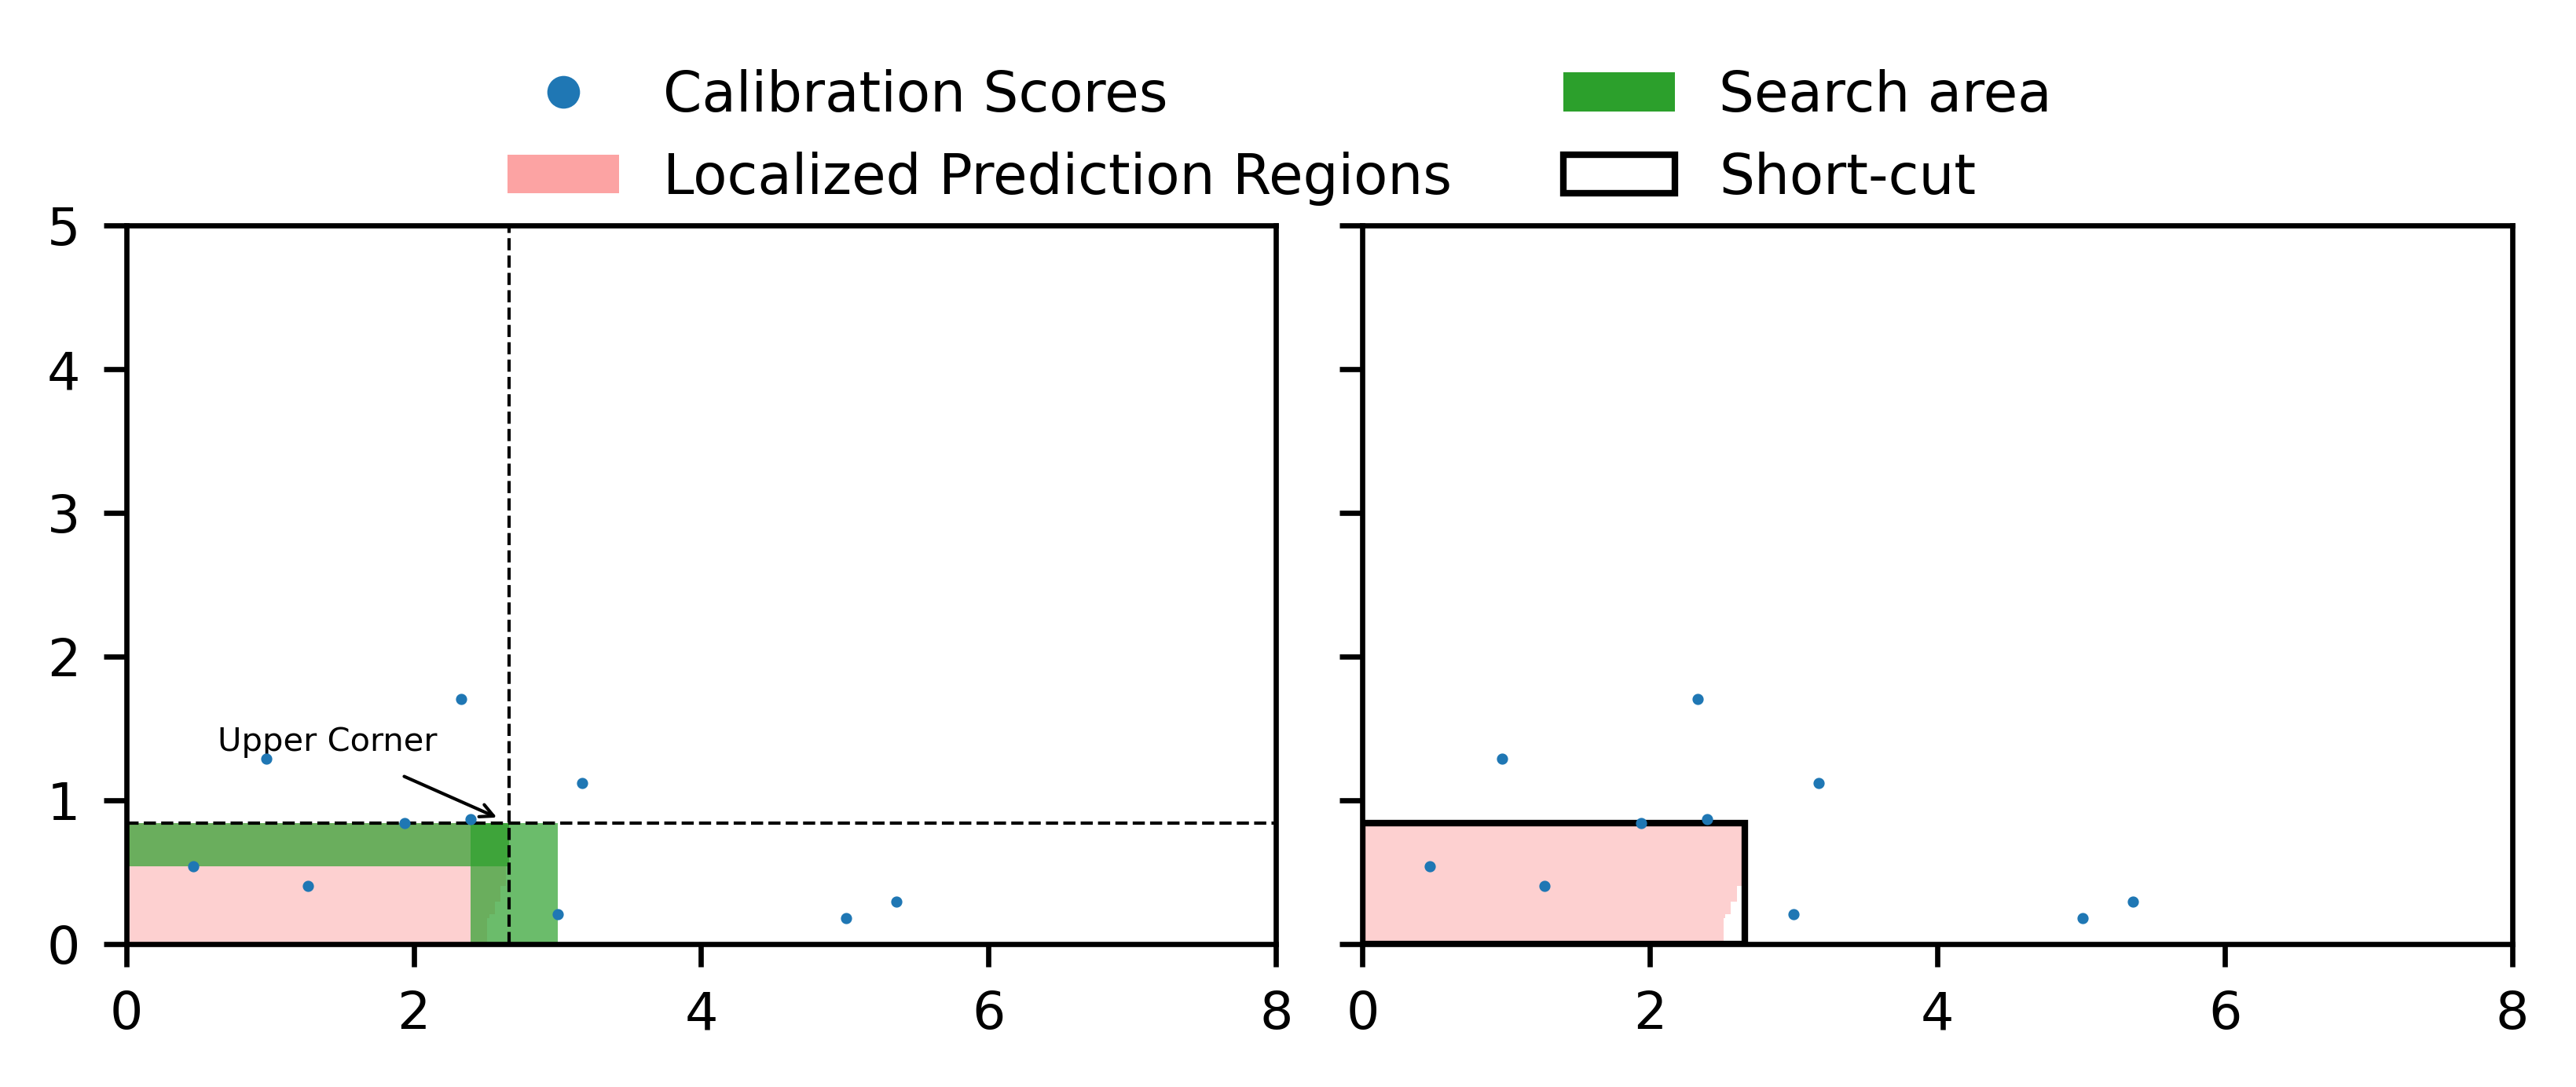

In [5]:
fig, axes = short_cut_illustration(scores=scores_cal10, alpha=0.8, include_legend=True, bbox_to_anchor=(0.5, 1.1))
for ax in axes:
    ax.set(xlim=(0, 8), ylim=(0, 5))
    ax.set_aspect('equal', adjustable='box')
fig.savefig("illustrations_in_paper/short_cut_10.pdf", bbox_inches="tight")

### n=50

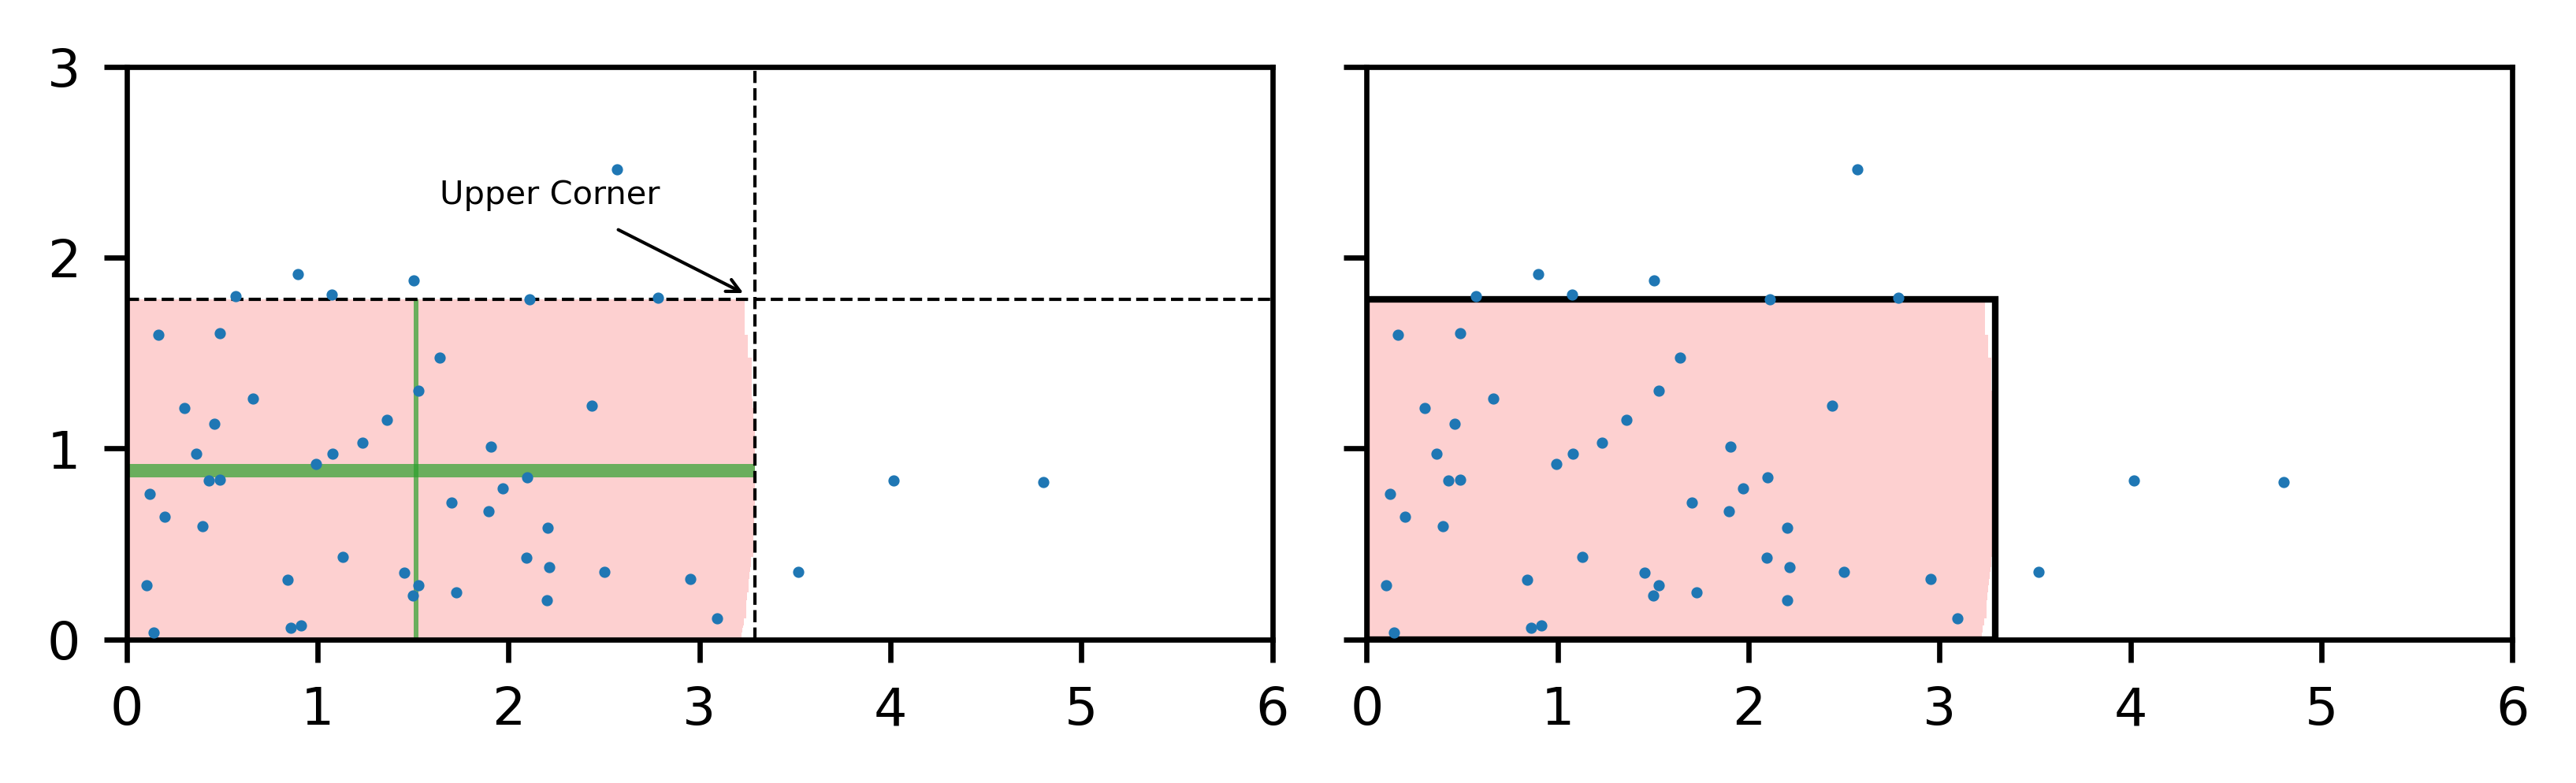

In [6]:
fig, axes = short_cut_illustration(scores_cal50, alpha=0.2, include_legend=False)
for ax in axes:
    ax.set(xlim=(0, 6), ylim=(0, 3))
    ax.set_aspect('equal', adjustable='box')
fig.savefig("illustrations_in_paper/short_cut_50.pdf", bbox_inches="tight")

## Overcoverage in small samples

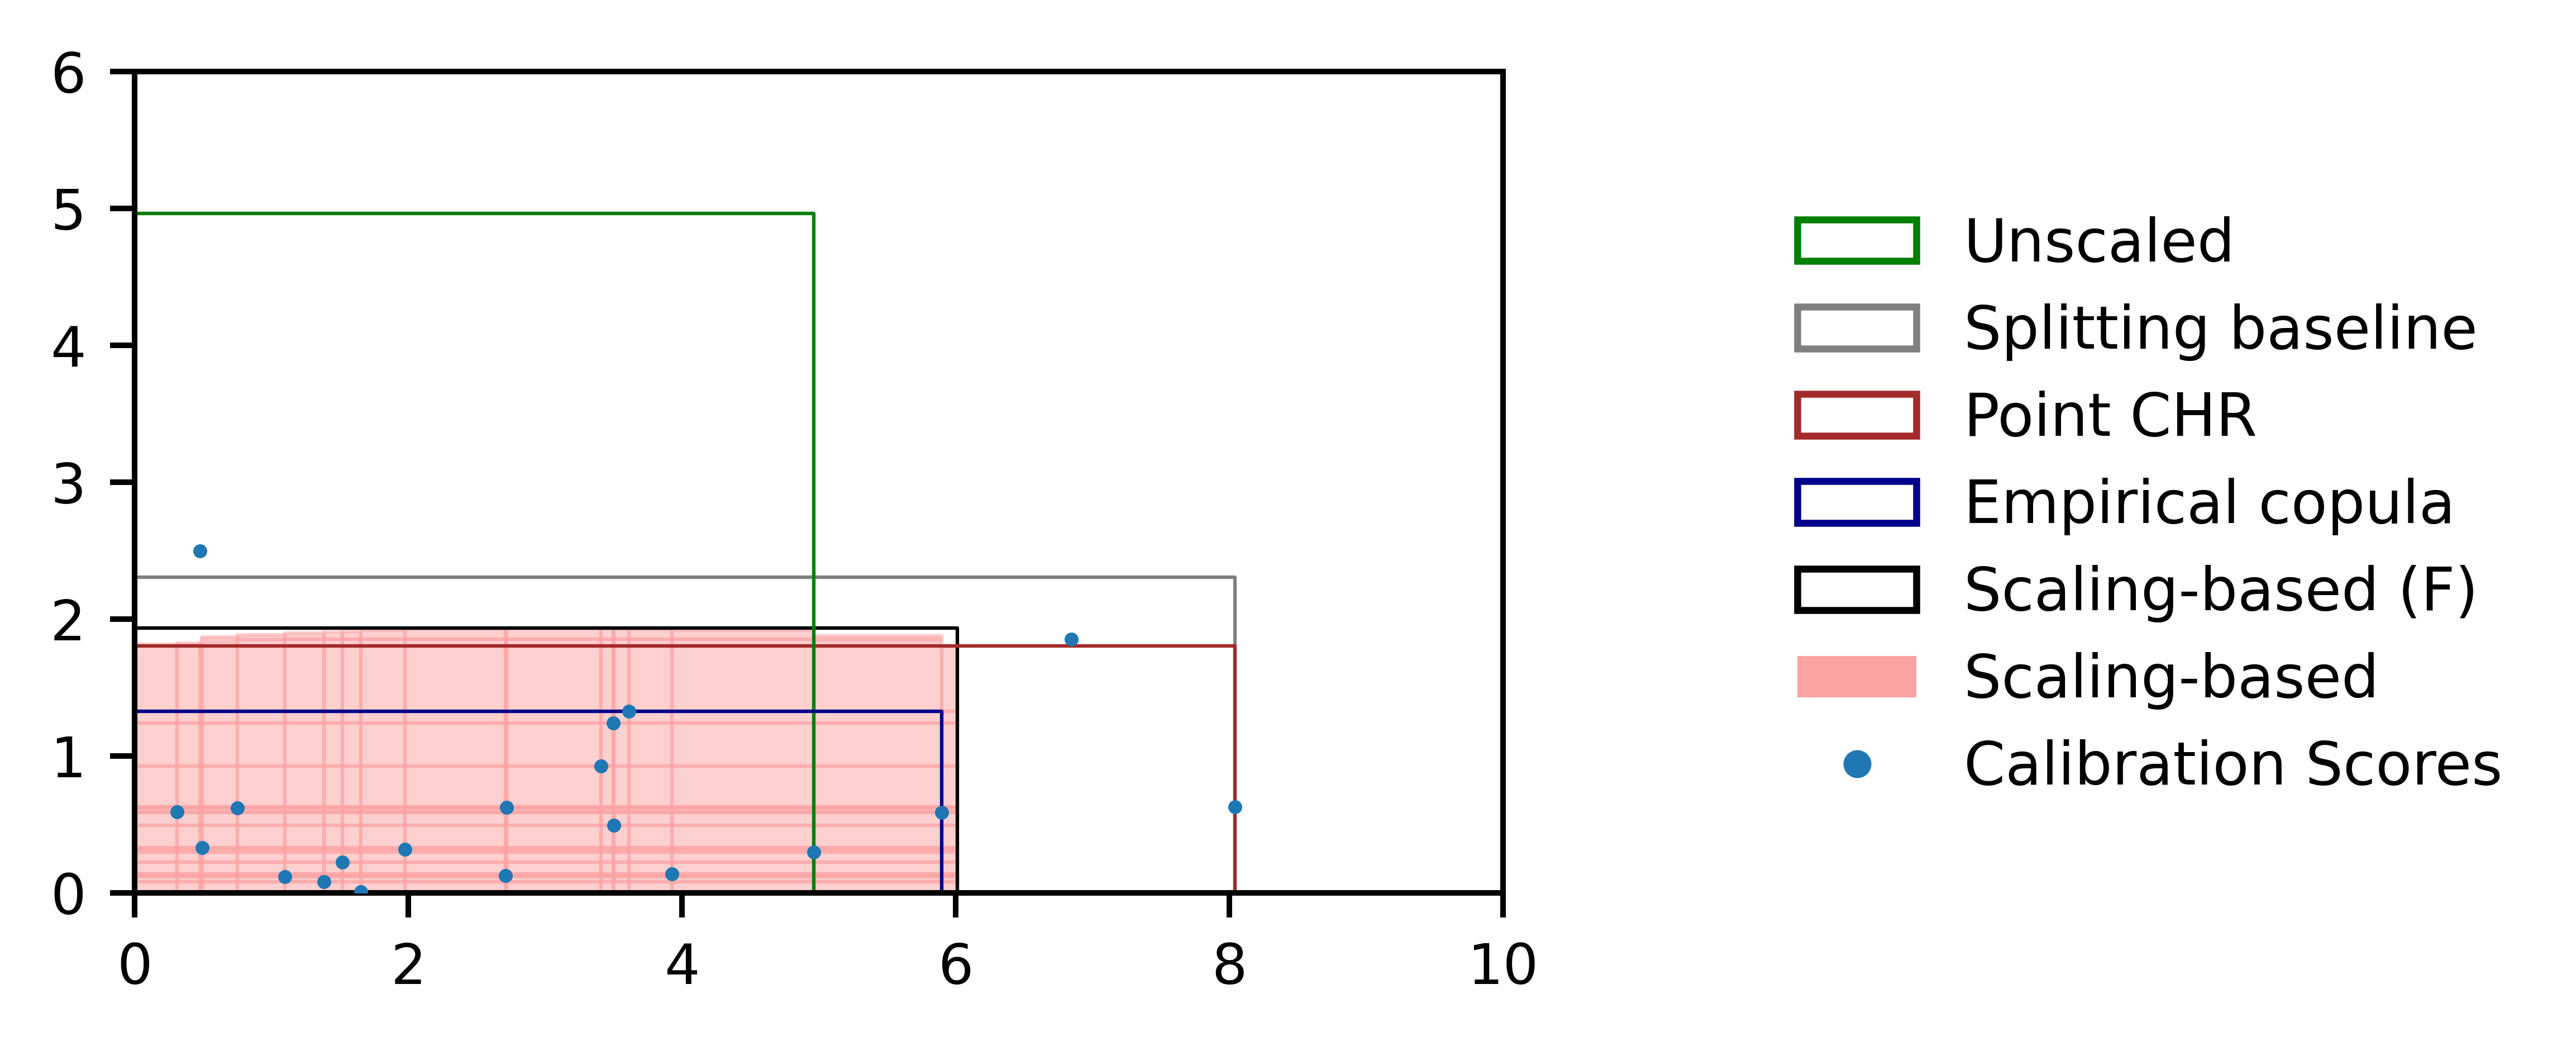

In [5]:
fig, ax = small_sample_illustration(scores_cal20, 0.2, bbox_to_anchor=(0.85, 0.5))
ax.set(xlim=(0, 10), ylim=(0,6))
fig.savefig("illustrations_in_paper/NPR_DS_LPR_prediction_region.pdf", dpi=900, bbox_inches="tight")

In [7]:
single_dim_text_file(methods=["Unscaled", "Splitting baseline", "Point CHR", "Empirical copula", "Scaling-based", "Scaling-based (F)"], 
                     dim=2, sample_list=[20], trials=100, alpha=0.2, noise_list=[[4, 1]], log_scale=False,
                     output_path="illustrations_in_paper/d2_20.txt")